<a href="https://colab.research.google.com/github/komalkhapekar7/Anova/blob/main/weather_intern_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt


### Step 1: Load the Data

In [ ]:
df = pd.read_csv('/content/weather.csv')

#### Step 2: Data Exploration

In [ ]:
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [ ]:
df.describe()

MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.000000    13.000000   
25%        31.000000      6.000000     11.000000    64.000000    32.250000   
50%        39.000000      7.000000     17.000000    72.000000    43.000000   
75%        46.000000     13.000000     24.000000    81.000000    55.000000   
max        98.000000     41.000000     52.000000    99.000000    96.000000   

       Pressure9am  Pressure3pm    Cloud9am    Cloud3pm     Temp9am  \
count   366.000000   366.000000  366.000000  366.000000  366.000000   
mean   1019.709016  1016.810383    3.890710    4.024590   12.358470   
std       6.686212     6.469422    2.956131    2.666268    5.630832   
min     996.500000   996.800000    0.000000    0.000000    0.100000   
25%    1015.350000  1012.800000    1.000000    1.000000    7.625000   
50%    1020.150000  1017.400000    3.500000    4.000000   12.550000   
75%    1024.475000  1021.475000    7.000000    7.000000   17.000000   
max    1035.700000  1033.200000    8.000000    8.000000   24.700000   

          Temp3pm     RISK_MM  
count  366.000000  366.000000  
mean    19.230874    1.428415  
std      6.640346    4.225800  
min      5.100000    0.000000  
25%     14.150000    0.000000  
50%     18.550000    0.000000  
75%     24.000000    0.200000  
max     34.500000   39.800000

In [ ]:
# To Create Dummies # Remove String from Columns and replce with Numbers
RainToday = pd.get_dummies(df['RainToday'],drop_first=True)
df = pd.concat([df,RainToday],axis=1)
df.drop('RainToday',axis=1,inplace=True)
df.rename(columns = {'Yes':'RainToday'}, inplace = True)

In [ ]:
# To Create Dummies # Remove String from Columns and replce with Numbers
RainTomorrow = pd.get_dummies(df['RainTomorrow'],drop_first=True)
df = pd.concat([df,RainTomorrow],axis=1)
df.drop('RainTomorrow',axis=1,inplace=True)
df.rename(columns = {'Yes':'RainTomorrow'}, inplace = True)

In [ ]:
df

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1             39.0          E          W           4.0  ...           36   
2             85.0          N        NNE           6.0  ...           69   
3             54.0        WNW          W          30.0  ...           56   
4             50.0        SSE        ESE          20.0  ...           49   
..             ...        ...        ...           ...  ...          ...   
361           76.0        SSE         NW           7.0  ...           15   
362           48.0        NNW        NNW           2.0  ...           22   
363           43.0        ENE        ENE          11.0  ...           47   
364           46.0        SSW        WNW           6.0  ...           39   
365           78.0         NW        WNW          31.0  ...           13   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  \
0         1019.7       1015.0         7         7     14.4     23.6      3.6   
1         1012.4       1008.4         5         3     17.5     25.7      3.6   
2         1009.5       1007.2         8         7     15.4     20.2     39.8   
3         1005.5       1007.0         2         7     13.5     14.1      2.8   
4         1018.3       1018.5         7         7     11.1     15.4      0.0   
..           ...          ...       ...       ...      ...      ...      ...   
361       1016.1       1010.8         1         3     20.4     30.0      0.0   
362       1020.0       1016.9         0         1     17.2     28.2      0.0   
363       1024.0       1022.8         3         2     14.5     18.3      0.0   
364       1021.0       1016.2         6         7     15.8     25.9      0.0   
365       1009.6       1009.2         1         1     23.8     28.6      0.0   

     RainToday  RainTomorrow  
0            0             1  
1            1             1  
2            1             1  
3            1             1  
4            1             0  
..         ...           ...  
361          0             0  
362          0             0  
363          0             0  
364          0             0  
365          0             0  

[366 rows x 22 columns]

### Step 3: Data Visualization (Part1)

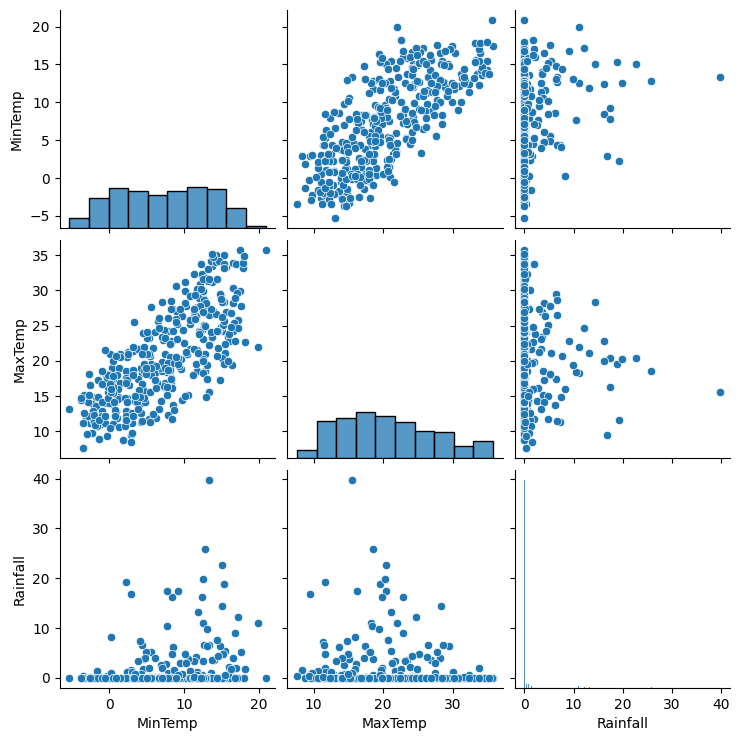

In [ ]:
# Pair Plot for selected columns
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [ ]:
# Set color palette
sns.set_palette("GnBu_d")
# Set style
sns.set_style('whitegrid')

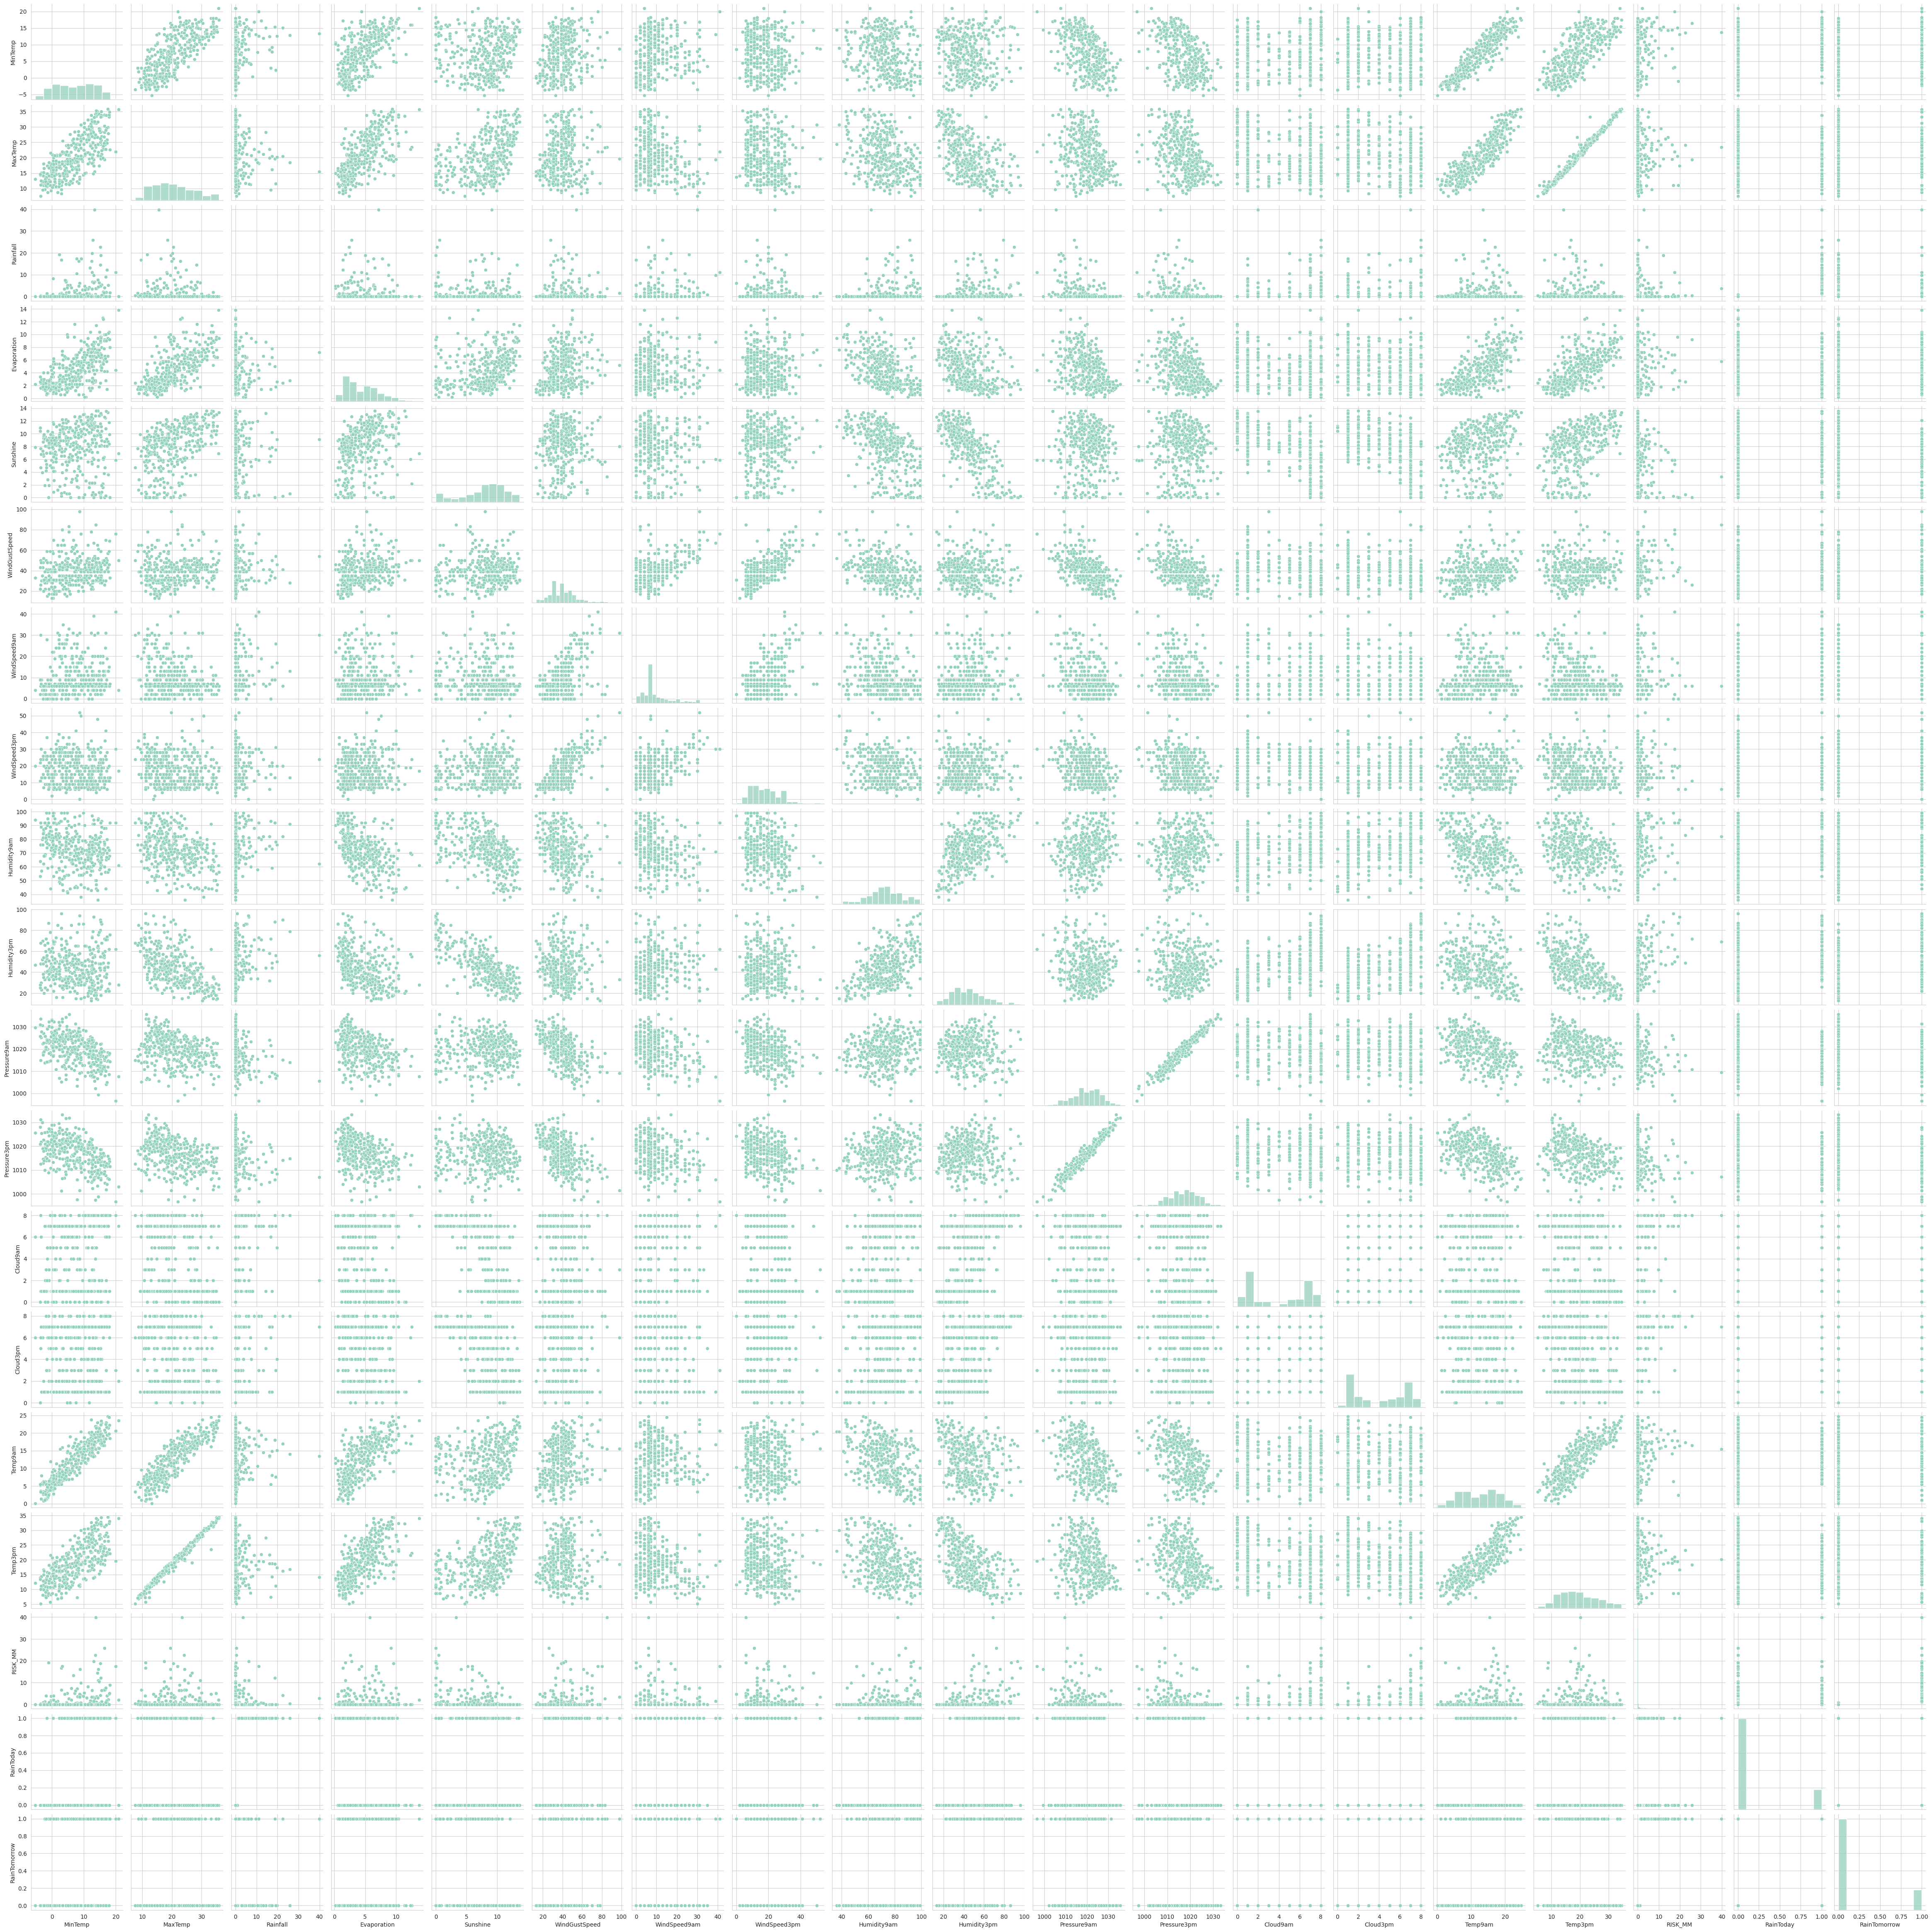

In [ ]:
# Pair Plot for all columns in the DataFrame
sns.pairplot(df)

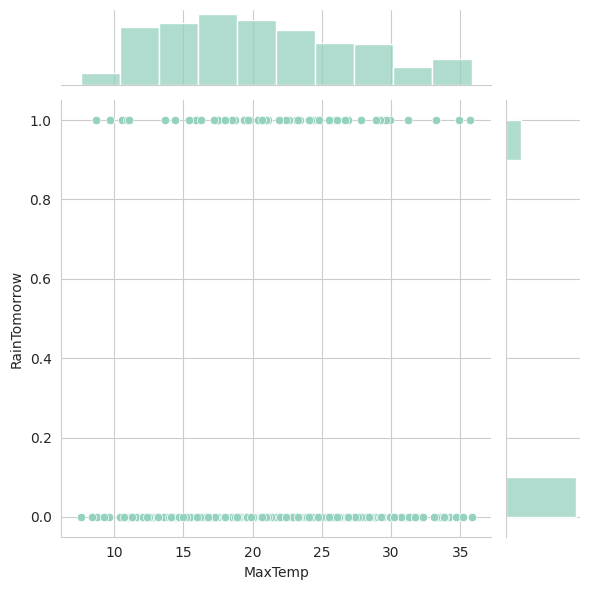

In [ ]:
# Joint Plot for MaxTemp vs. RainTomorrow
sns.jointplot(x = 'MaxTemp', y = 'RainTomorrow', data = df)

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>],
       [<Axes: title={'center': 'RISK_MM'}>,
        <Axes: title={'center': 'RainToday'}>,
        <Axes: title={'center': 'RainTomorrow'}>, <Axes: >]], dtype=object)

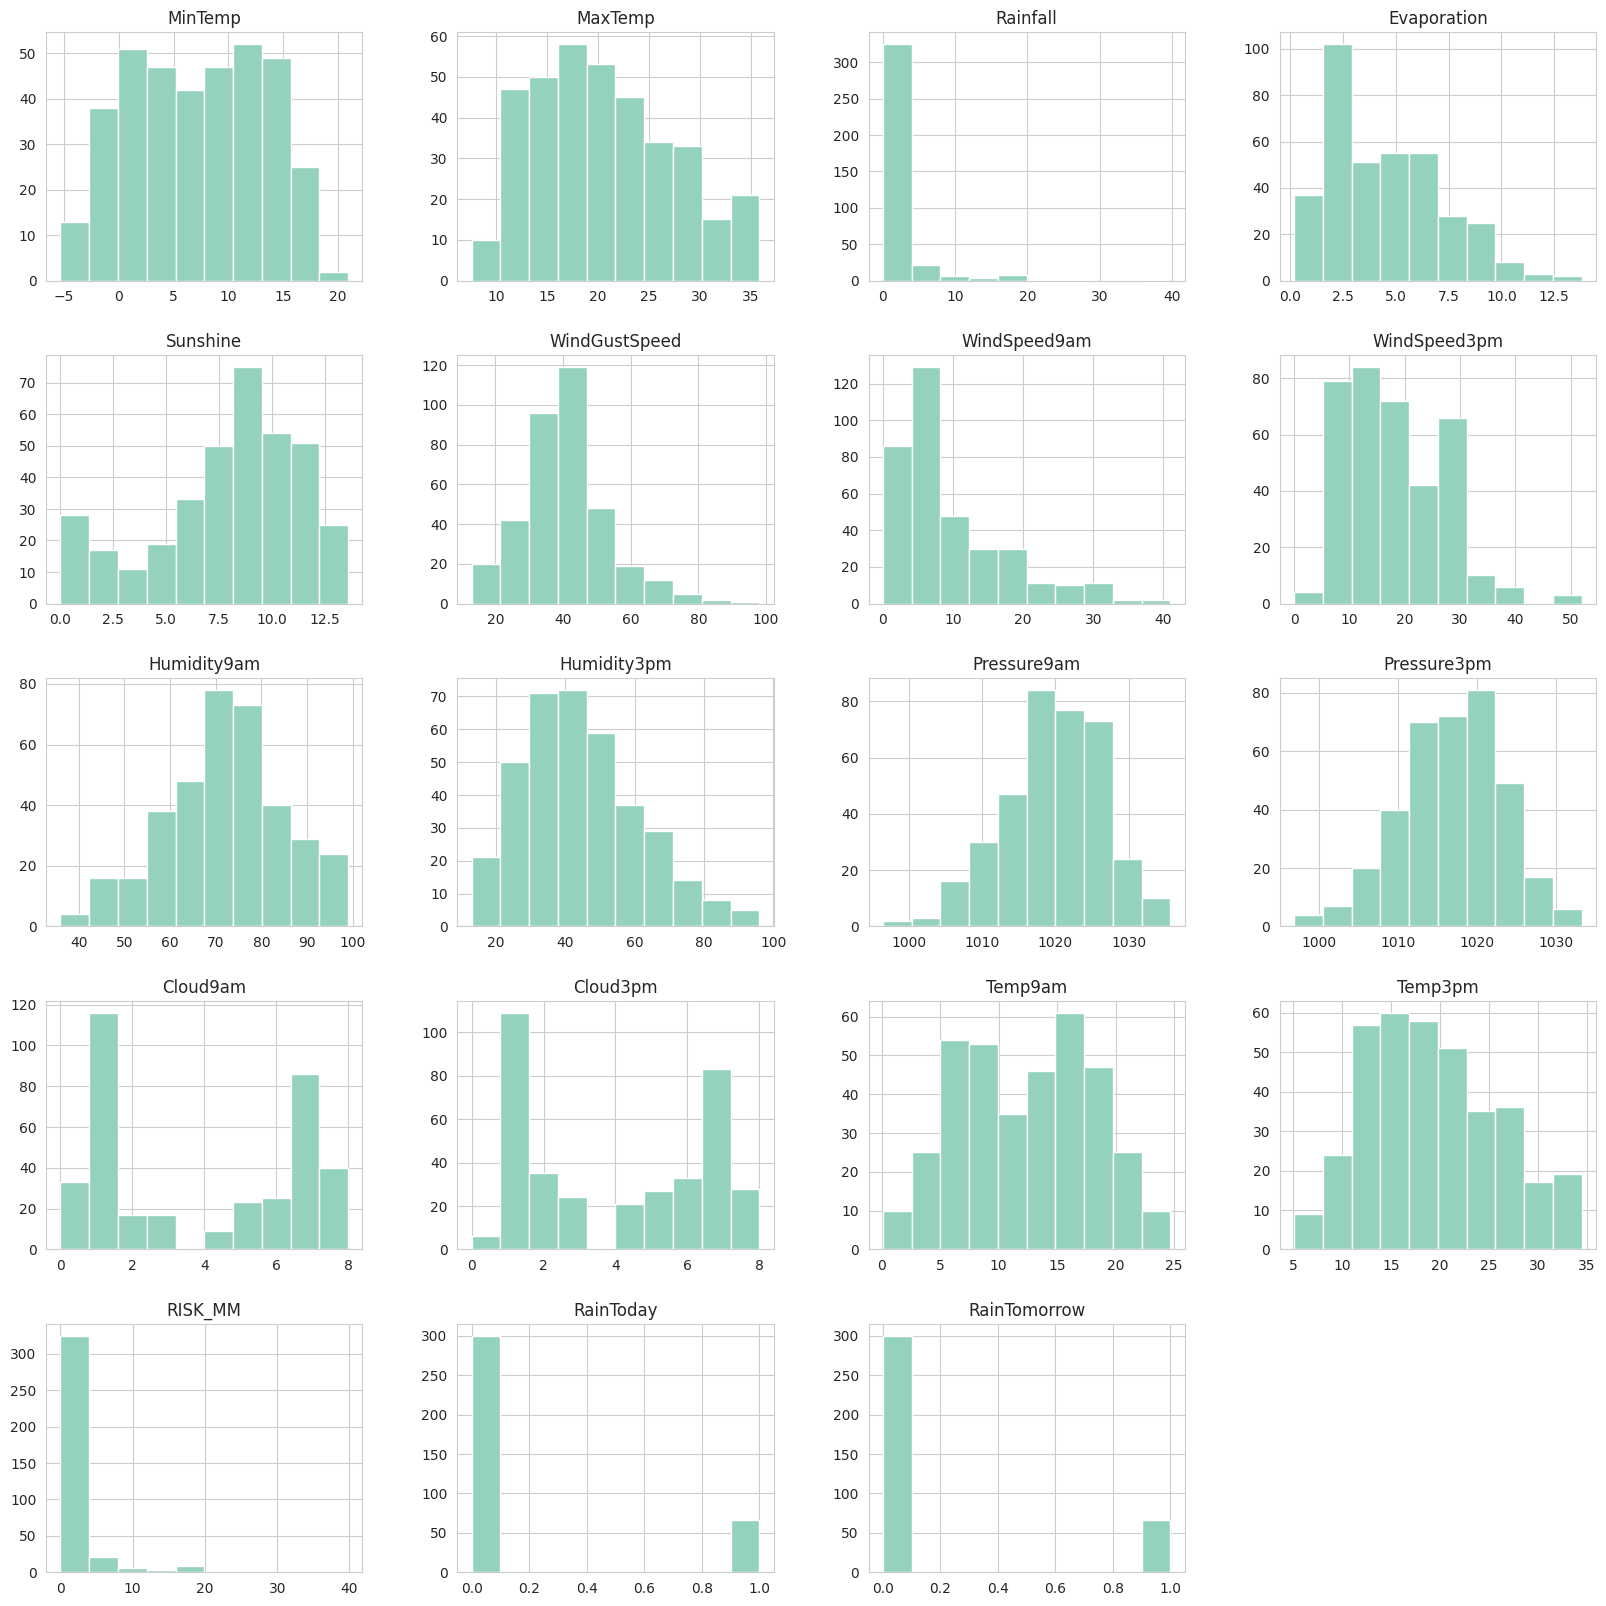

In [ ]:
# Histograms for all columns in the DataFrame
df.hist(figsize = (20,20))

<ipython-input-14-cc649ca3ece3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

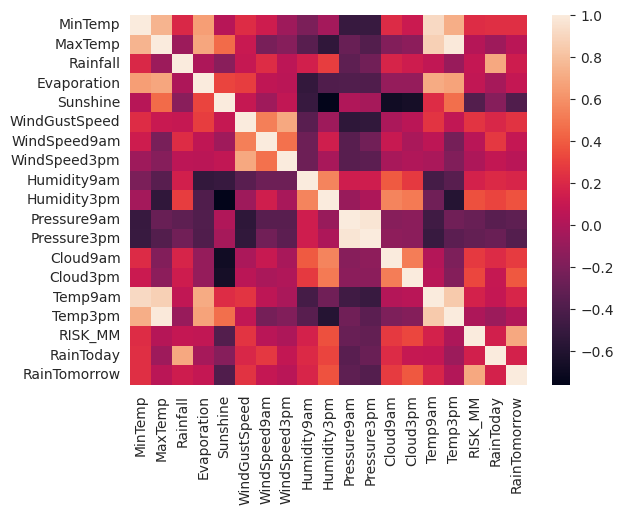

In [ ]:
# Heatmap of the correlation matrix
sns.heatmap(df.corr())

<ipython-input-15-33382e5129ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MinTemp'])


<Axes: xlabel='MinTemp', ylabel='Density'>

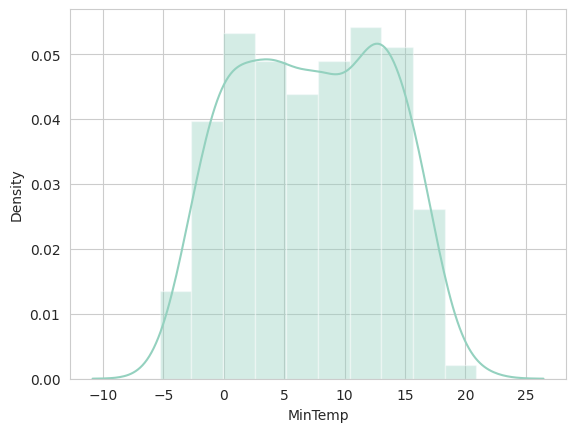

In [ ]:
# Distribution Plot for MinTemp
sns.distplot(df['MinTemp'])

### Step 5: Data Analysis

In [ ]:
mean_max_temp = df['MaxTemp'].mean()
print("Mean MaxTemp:", mean_max_temp)

Mean MaxTemp: 20.550273224043714


In [ ]:
median_max_temp = df['MaxTemp'].median()
print("Median MaxTemp:", median_max_temp)


Median MaxTemp: 19.65


In [ ]:
std_max_temp = df['MaxTemp'].std()
print("Standard Deviation of MaxTemp:", std_max_temp)


Standard Deviation of MaxTemp: 6.690515669598577


In [ ]:
min_max_temp = df['MaxTemp'].min()
max_max_temp = df['MaxTemp'].max()
print("Min MaxTemp:", min_max_temp)
print("Max MaxTemp:", max_max_temp)


Min MaxTemp: 7.6
Max MaxTemp: 35.8


In [ ]:
correlation_max_temp_min_temp = df['MaxTemp'].corr(df['MinTemp'])
print("Correlation between MaxTemp and MinTemp:", correlation_max_temp_min_temp)


Correlation between MaxTemp and MinTemp: 0.752470794591001


In [ ]:
correlation_matrix = df[['MaxTemp', 'MinTemp']].corr()
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
          MaxTemp   MinTemp
MaxTemp  1.000000  0.752471
MinTemp  0.752471  1.000000


### Step 6: Data Visualization (Part 2)

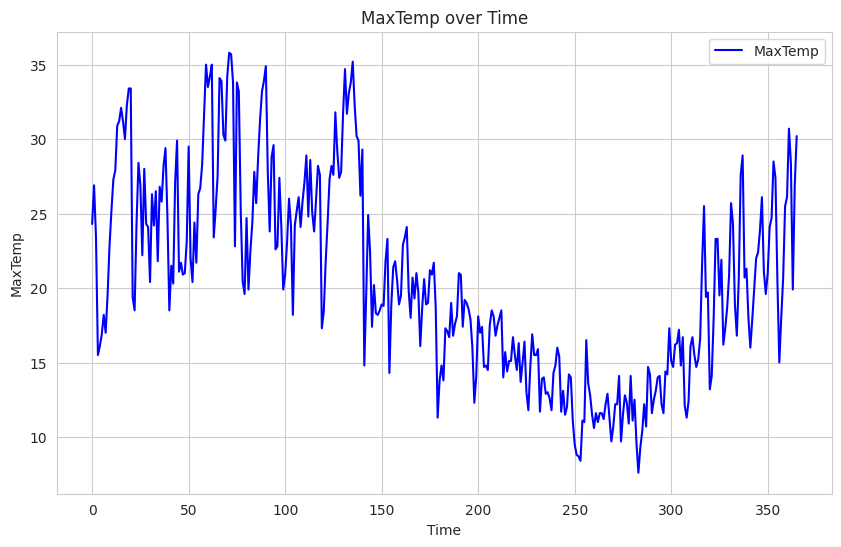

In [ ]:
#Line Plot: MaxTemp over Time
plt.figure(figsize=(10, 6))
plt.plot(df['MaxTemp'], label='MaxTemp', color='blue')
plt.title('MaxTemp over Time')
plt.xlabel('Time')
plt.ylabel('MaxTemp')
plt.legend()
plt.show()


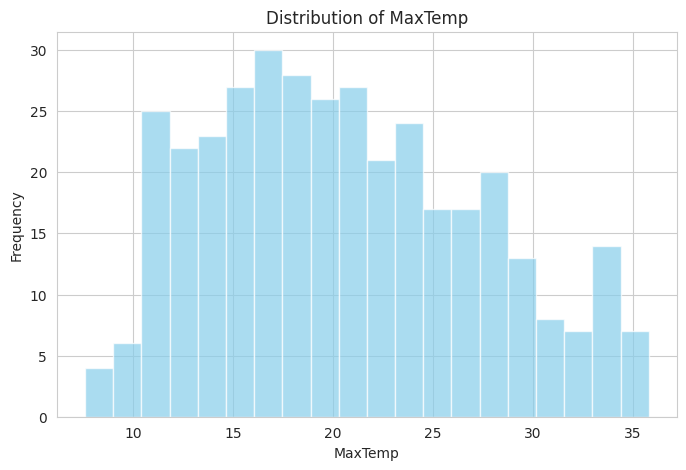

In [ ]:
#Histogram: Distribution of MaxTemp
plt.figure(figsize=(8, 5))
plt.hist(df['MaxTemp'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of MaxTemp')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.show()

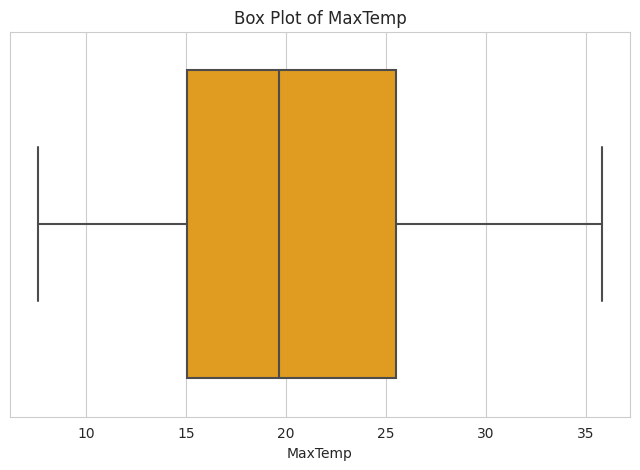

In [ ]:
#Box Plot: MaxTemp Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MaxTemp'], color='orange')
plt.title('Box Plot of MaxTemp')
plt.xlabel('MaxTemp')
plt.show()


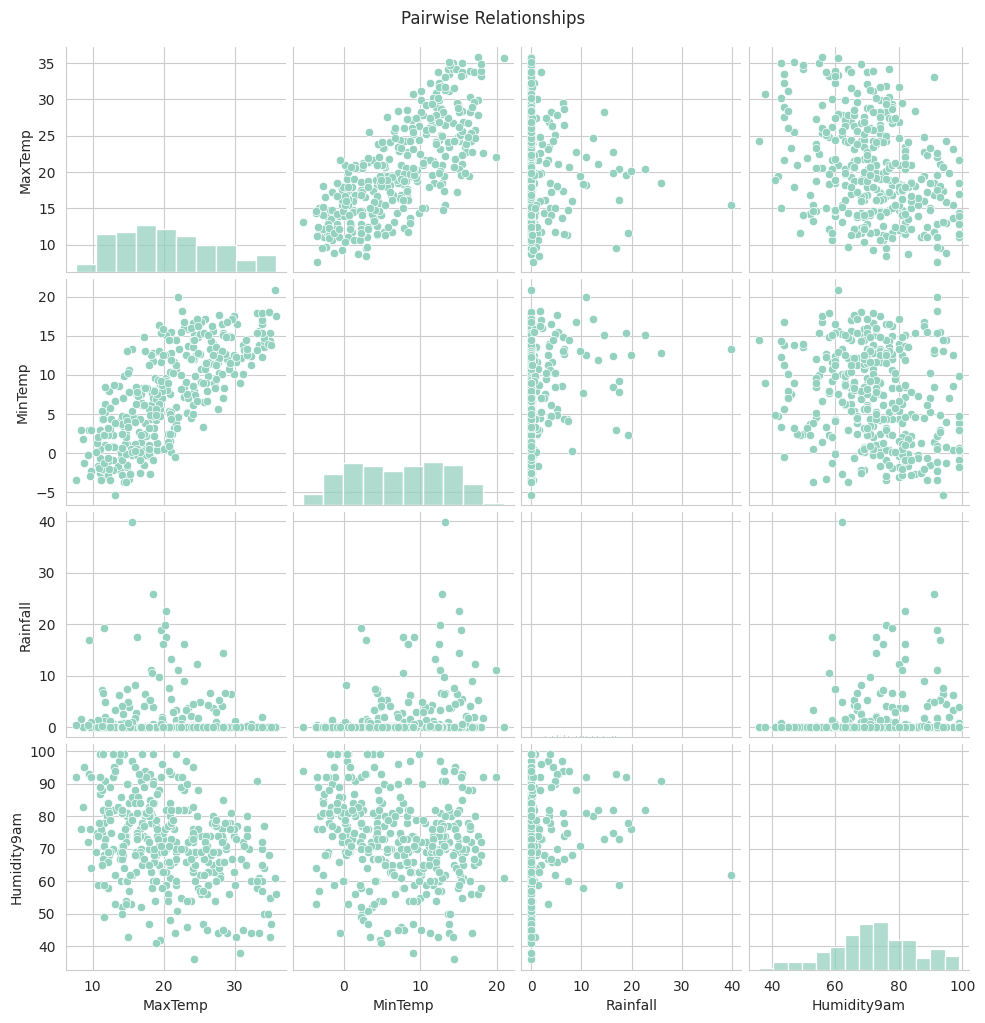

In [ ]:
#Pair Plot: Pairwise Relationships
sns.pairplot(df[['MaxTemp', 'MinTemp', 'Rainfall', 'Humidity9am']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

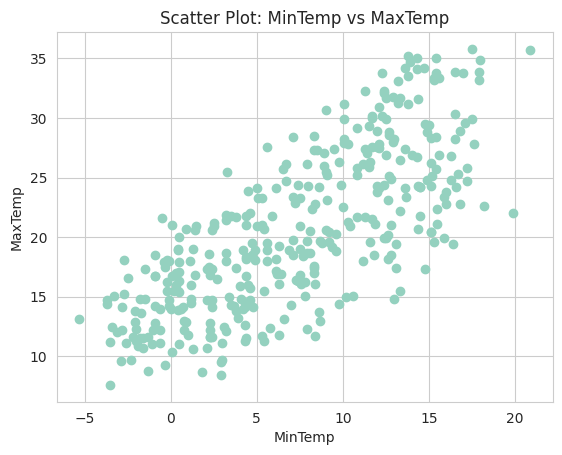

In [ ]:
# Scatter Plot for MinTemp vs MaxTemp
plt.scatter(df['MinTemp'], df['MaxTemp'])
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.title('Scatter Plot: MinTemp vs MaxTemp')
plt.show()


### Step 7: Advanced Analysis

In [ ]:
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]


In [ ]:
X

MinTemp  MaxTemp
0        8.0     24.3
1       14.0     26.9
2       13.7     23.4
3       13.3     15.5
4        7.6     16.1
..       ...      ...
361      9.0     30.7
362      7.1     28.4
363     12.5     19.9
364     12.5     26.9
365     12.3     30.2

[366 rows x 2 columns]

In [ ]:
# Prepare the data for prediction
y = df['RainTomorrow']

In [ ]:
y

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 366, dtype: uint8

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 341 to 102
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  292 non-null    float64
 1   MaxTemp  292 non-null    float64
dtypes: float64(2)
memory usage: 6.8 KB


In [ ]:
# Create and train a linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predicting Test Data
predictions = lm.predict(X_test)

In [ ]:
#calculate the Mean Squared Error,Mean Absolute Error,Root Mean Squared Error.
print('MAE:',
      metrics.mean_absolute_error(y_test, predictions), ' ',
      (1./len(y_test))*(sum(abs(y_test-predictions))))
print('MSE:',
      metrics.mean_squared_error(y_test, predictions), ' ',
      (1./len(y_test))*(sum((y_test-predictions)**2)))
print('RMSE:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)), ' ',
      sqrt((1./len(y_test))*(sum((y_test-predictions)**2))))

MAE: 0.2993506728165227   0.2993506728165227
MSE: 0.15394088508399592   0.15394088508399587
RMSE: 0.3923530108002179   0.39235301080021784


### Step 8: Conclusions and Insights

###Rainfall Distribution:
###Check the distribution of rainfall in the dataset. Is it skewed? Are there months with exceptionally high or low rainfall.

Summary Statistics of Rainfall:
 count    366.000000
mean       1.428415
std        4.225800
min        0.000000
25%        0.000000
50%        0.000000
75%        0.200000
max       39.800000
Name: Rainfall, dtype: float64


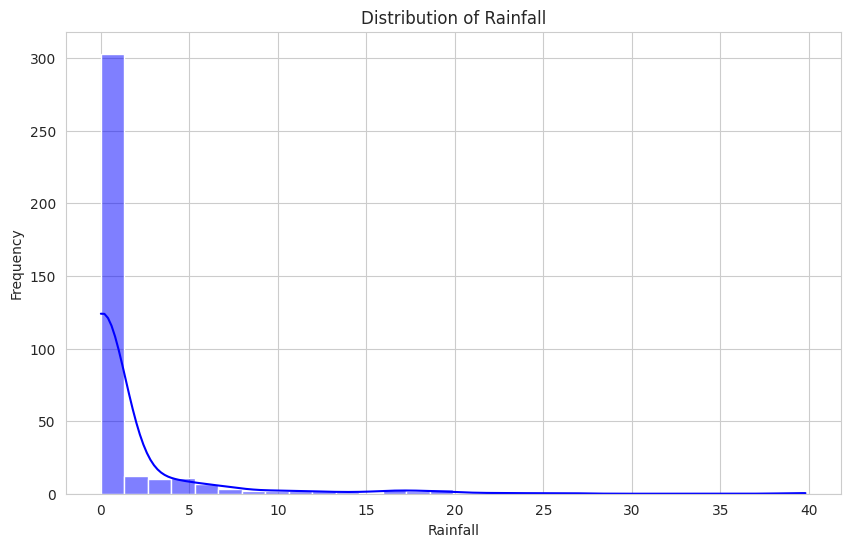

In [ ]:
# Summary statistics of rainfall
rainfall_summary = df['Rainfall'].describe()
print("Summary Statistics of Rainfall:\n", rainfall_summary)

# Histogram to visualize the distribution of rainfall
plt.figure(figsize=(10, 6))
sns.histplot(df['Rainfall'], bins=30, kde=True, color='blue')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()


###Temperature Trends
###Analyze the trends in maximum and minimum temperatures. Are there noticeable patterns or seasons?

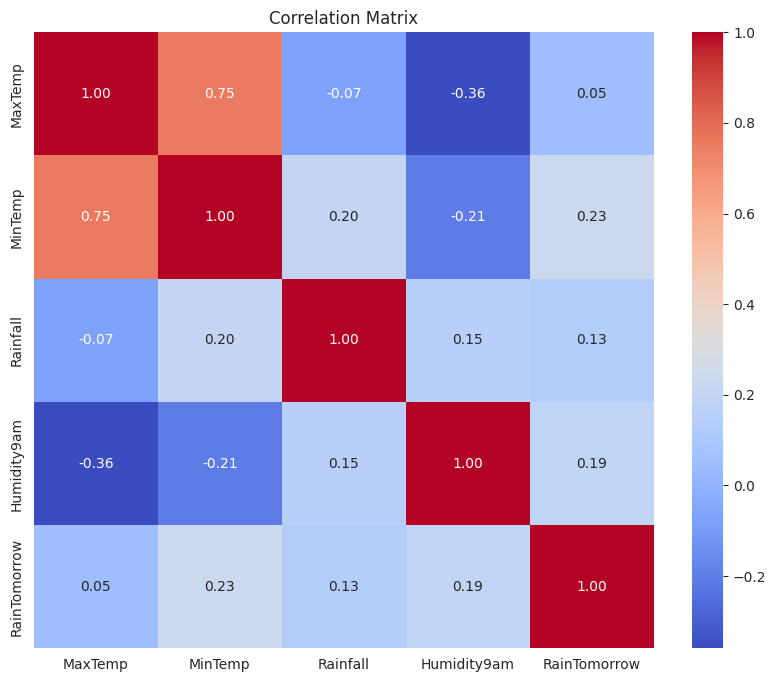

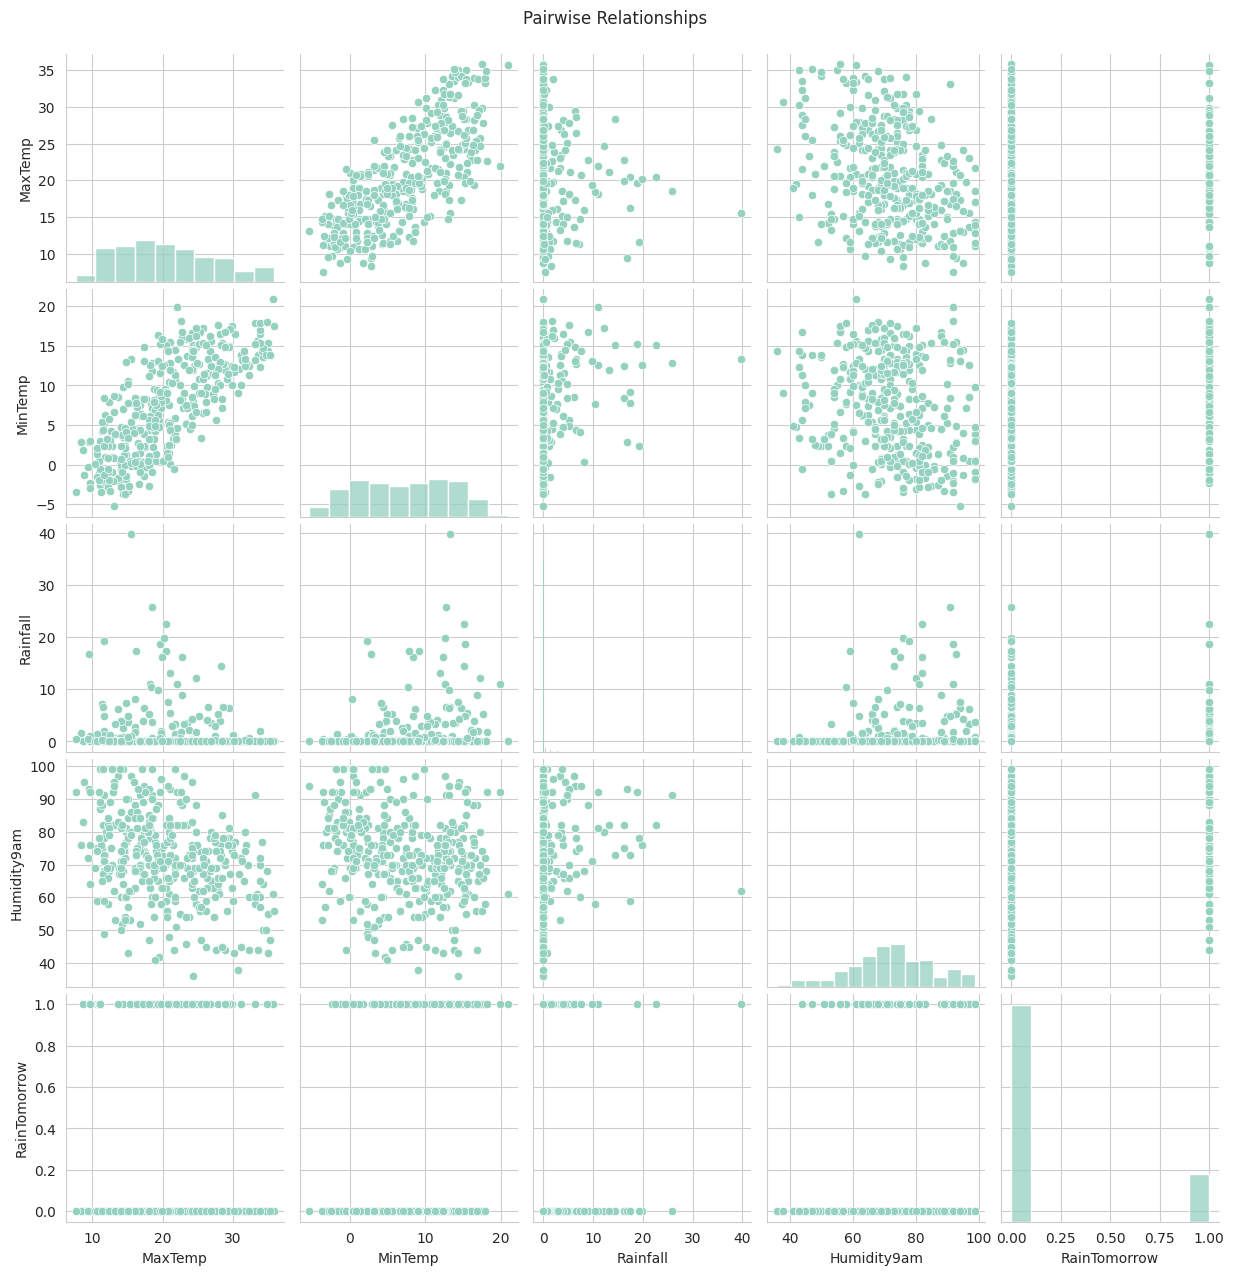

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['MaxTemp', 'MinTemp', 'Rainfall', 'Humidity9am',
                          'RainTomorrow']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pair plot for selected variables
sns.pairplot(df[['MaxTemp', 'MinTemp', 'Rainfall', 'Humidity9am',
                 'RainTomorrow']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()
